In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=7c59a5e8324679d89296aff01a2dc3b4cc592d6d2ba3636cb9badd7055d0c5b3
  Stored in directory: c:\users\jullier\appdata\local\pip\cache\wheels\94\f0\94\cb5d98a5536d62811bb509b22bd2597d5bd7154752299383d3
Successfully built multitasking


In [108]:
import yfinance as yf

In [109]:
ticker = input('please insert the ticker you want to predict: ')
data = yf.download(f'{ticker}', start="2017-06-03", end="2022-06-02", interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [110]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-29,38.395000,38.862499,38.222500,38.862499,36.789818,111082800.0
2017-06-05,38.584999,38.994999,36.505001,37.244999,35.258572,636638800.0
2017-06-12,36.435001,36.875000,35.549999,35.567501,33.670551,882121600.0
2017-06-19,35.915001,36.790001,35.915001,36.570000,34.619579,533012000.0
2017-06-26,36.792500,37.070000,35.570000,36.005001,34.084721,508240800.0
...,...,...,...,...,...,...
2022-05-06,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-09,154.929993,156.740005,138.800003,147.110001,147.110001,686023400.0
2022-05-16,145.550003,149.770004,132.610001,137.589996,137.589996,548013200.0


In [111]:
df = pd.DataFrame(data) # I created a dataframe with the downloaded data.

In [112]:
df.dropna(inplace=True) # I dropped all nan values.

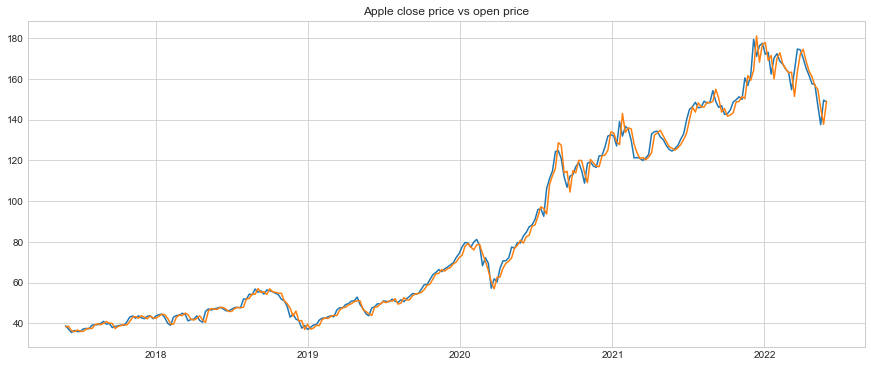

In [113]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15, 6))
plt.title('Apple close price vs open price')
plt.plot(df[['Close', 'Open']])  # I just created a plot to see if everything its ok 

In [136]:
# I defined what data will be useful for our testing and train data.

df_test = df['Close'] 
y = df_test
X = df[['Open','High','Low']] 

In [137]:
# I choose the 80% dataframe's data for the training model
# for now im using this method, later i will use train_test_split method from sklearn
t=.8 
t = int(t*len(df_test)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [139]:
linear = LinearRegression().fit(X_train,y_train)
predicted_price = linear.predict(X_test) 

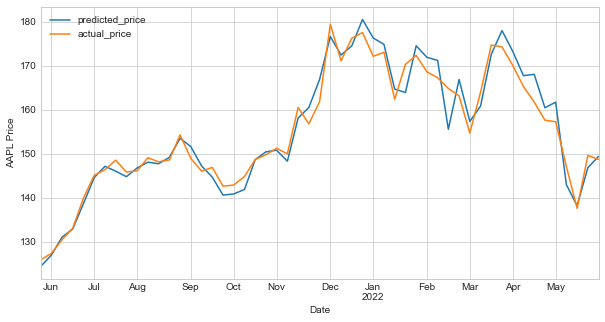

In [224]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [129]:
linear.coef_

array([-0.56738332,  0.97505394,  0.57586179])

In [130]:
linear.intercept_

0.4398519368847218

In [140]:
cdf = pd.DataFrame(linear.coef_, X.columns, columns=['Coeff'])

In [132]:
cdf

,Coeff
Open,-0.567383
High,0.975054
Low,0.575862


Text(0, 0.5, 'Predicted Y')

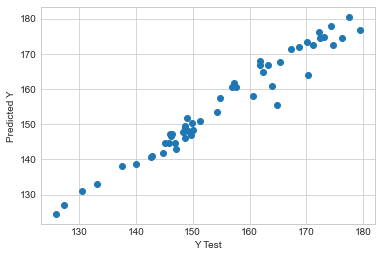

In [225]:
plt.scatter(y_test,predicted_price)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

In [151]:
linear = LinearRegression().fit(X_train,y_train)
predicted_price = linear.predict(X_test)  

In [152]:
Df_final = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_price})

In [147]:
Df_final

,Actual,Predicted
Date,,
2019-02-18,43.242500,43.016988
2020-12-14,126.660004,127.216391
2020-09-07,112.000000,116.625320
2019-09-09,54.687500,55.545410
2021-10-11,144.839996,141.163493
2020-08-31,120.959999,126.448338
2017-08-28,41.012501,40.955403
2020-02-17,78.262497,79.546438
2021-04-19,134.320007,132.448221


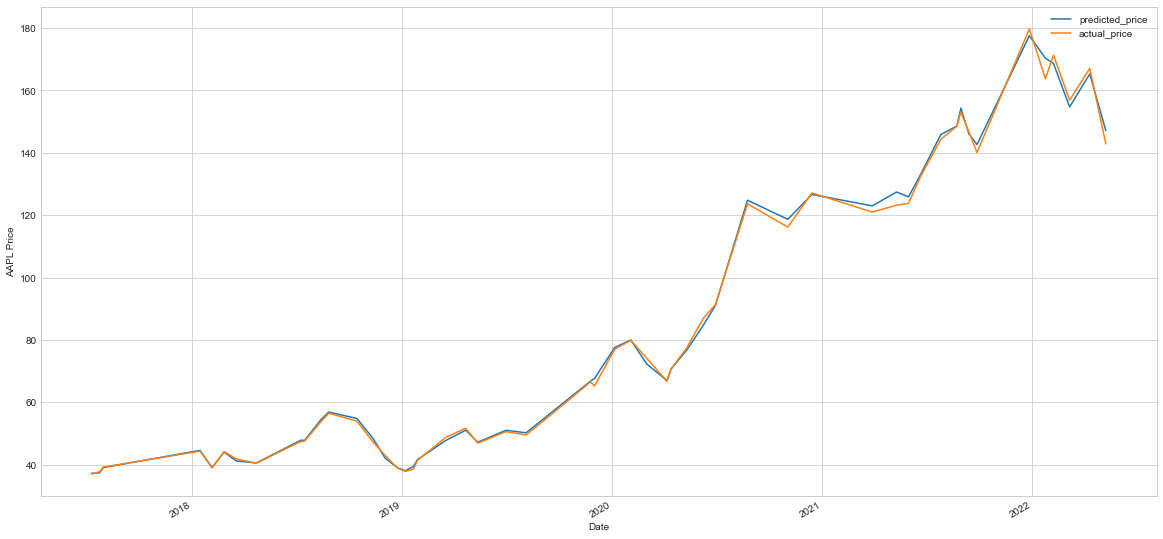

In [219]:
Df_final.plot(figsize=(20,10))  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

<AxesSubplot:xlabel='Date'>

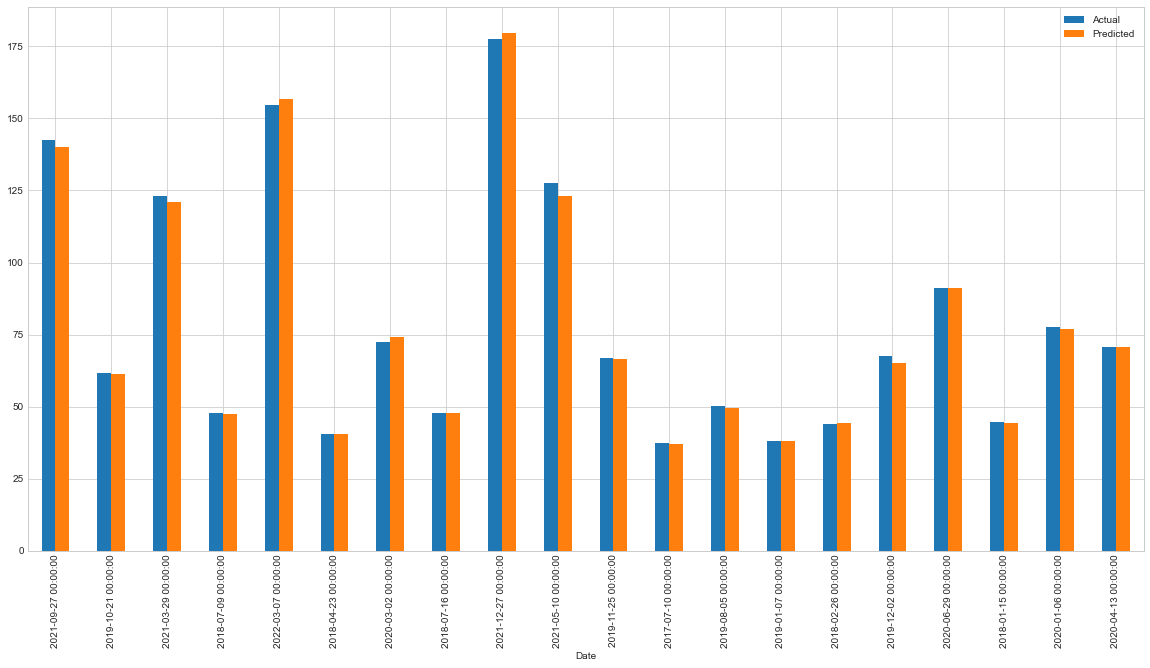

In [223]:
#checking the last 20 prices in bar chart to see the diferences in results.
Df_final.head(20).plot.bar(figsize=(20,10))


In [214]:
# I'm gonna check if the models is okey by checking it's residuals.
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, predicted_price))
print('MSE: ', metrics.mean_squared_error(y_test, predicted_price))
print('RMS: ', np.sqrt(metrics.mean_squared_error(y_test, predicted_price))) 

MAE:  2.345010569396838
MSE:  8.640768515933063
RMS:  2.939518415647887
